<a id="section0"></a>
# <font color="#004D7F" size=6>Entrenamiento y clasificación de imágenes con YOLO</font>
---
### 
---

In [9]:
# Se Importan las librerías
import os
import cv2
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Se muestra la ruta principal del dataset
ruta_dataset = "dataset_toros"

print("Ruta del dataset:", os.path.abspath(ruta_dataset))
print("\nVerificación completada: El dataset esta listo para usarse.")

Ruta del dataset: d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\dataset_toros

Verificación completada: El dataset esta listo para usarse.


In [11]:
# Se instala la librería de YOLO (Ultralytics) Esta celda solo se necesita ejecutar la primera vez.

#!pip install ultralytics

In [12]:
# Se carga un modelo base pequeño (yolov8n) para detección
modelo_yolo = YOLO("yolov8n.pt")

print("\nModelo YOLO cargado correctamente.")


Modelo YOLO cargado correctamente.


In [13]:
# Se entrena el modelo YOLO con el dataset
resultados_entrenamiento = modelo_yolo.train(data="dataset_toros/data.yaml", epochs=20)

print("\n ENTRENAMIENTO TERMINADO.")

New https://pypi.org/project/ultralytics/8.3.232 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.12.6 torch-2.9.1+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset_toros/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=Fal

In [14]:
# Carpeta donde YOLO guarda el entrenamiento
carpeta_entrenamiento = resultados_entrenamiento.save_dir

print("Carpeta de entrenamiento:", carpeta_entrenamiento)
print("\nVerificación completada: Listo para cargar el modelo.")


Carpeta de entrenamiento: D:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\runs\detect\train2

Verificación completada: Listo para cargar el modelo.


In [15]:
# Se cargar el modelo entrenado (best.pt)

# Usamos la misma carpeta_entrenamiento que obtuvimos después de entrenar
ruta_modelo_toros = os.path.join(str(carpeta_entrenamiento), "weights", "best.pt")

print("Ruta del modelo entrenado:", ruta_modelo_toros)

# Cargamos el modelo entrenado
modelo_toros = YOLO(ruta_modelo_toros)

print("\nVerificación completada: Modelo entrenado cargado correctamente.")

Ruta del modelo entrenado:

 D:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\runs\detect\train2\weights\best.pt

Verificación completada: Modelo entrenado cargado correctamente.


In [16]:
# Se eligen las imágenes random para prueba

# Carpeta donde tomaremos las imágenes para probar el modelo
carpeta_imagenes_prueba = "dataset_toros/images/test"

# se obtiene la lista de archivos
lista_archivos = os.listdir(carpeta_imagenes_prueba)

total_imagenes = len(lista_archivos)
print("Total de imágenes en test:", total_imagenes)

# Se define el número de imágenes por usar para la prueba
numero_imagenes_prueba = 3

# Se eligen las imágenes aleatorias
imagenes_prueba = random.sample(lista_archivos, numero_imagenes_prueba)

print("\nImágenes de prueba seleccionadas (aleatorias):")
for nombre in imagenes_prueba:
    print(" -", nombre)

Total de imágenes en test: 20

Imágenes de prueba seleccionadas (aleatorias):
 - c85ab3de-064.jpg
 - 0a37e946-092.jpeg
 - b5e41130-083.jpeg



Procesando imagen: dataset_toros/images/test\c85ab3de-064.jpg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\dataset_toros\images\test\c85ab3de-064.jpg: 384x640 1 toro, 111.6ms
Speed: 2.6ms preprocess, 111.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


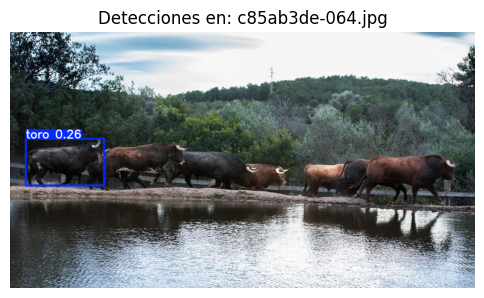


Procesando imagen: dataset_toros/images/test\0a37e946-092.jpeg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\dataset_toros\images\test\0a37e946-092.jpeg: 480x640 1 toro, 122.0ms
Speed: 2.1ms preprocess, 122.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


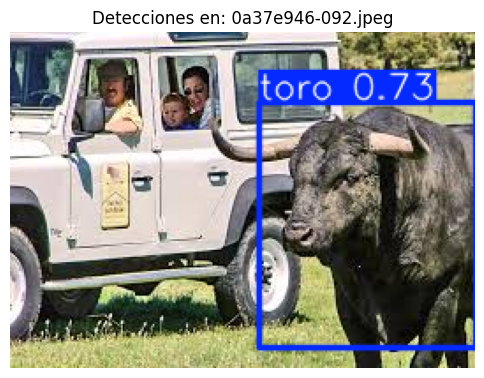


Procesando imagen: dataset_toros/images/test\b5e41130-083.jpeg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\dataset_toros\images\test\b5e41130-083.jpeg: 448x640 1 toro, 120.5ms
Speed: 2.1ms preprocess, 120.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


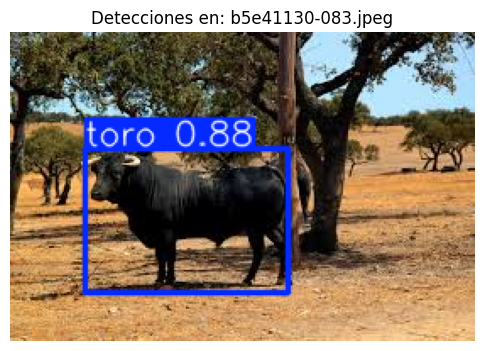

In [22]:
# Aplicamos el modelo a las imágenes de prueba y mostrar resultados

# Recorremos la lista de imágenes de prueba   
for nombre_imagen in imagenes_prueba:

    # Construimos la ruta completa de la imagen
    ruta_imagen = os.path.join(carpeta_imagenes_prueba, nombre_imagen)

    print("\nProcesando imagen:", ruta_imagen)

    # Aplicamos el modelo entrenado a la imagen
    resultados = modelo_toros(ruta_imagen)

    # Tomamos el primer resultado y dibujamos las cajas sobre la imagen
    imagen_con_cajas = resultados[0].plot()

    # Convertimos de BGR a RGB para mostrar correctamente con matplotlib
    imagen_con_cajas_rgb = cv2.cvtColor(imagen_con_cajas, cv2.COLOR_BGR2RGB)

    # Mostramos la imagen
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen_con_cajas_rgb)
    plt.title(f"Detecciones en: {nombre_imagen}")
    plt.axis("off")
    plt.show()


PRocesando imagen: imagenes_nuevas\16848566628513.jpg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\16848566628513.jpg: 448x640 1 toro, 133.0ms
Speed: 2.6ms preprocess, 133.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


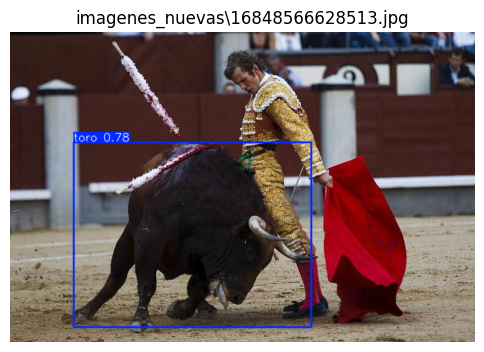

PRocesando imagen: imagenes_nuevas\corridas-de-toros-El-Payo-Garcia-1280x720.png

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\corridas-de-toros-El-Payo-Garcia-1280x720.png: 384x640 1 toro, 109.1ms
Speed: 1.9ms preprocess, 109.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


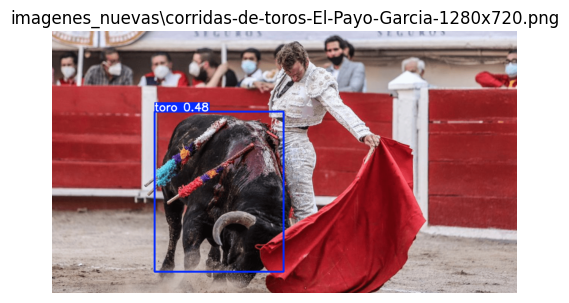

PRocesando imagen: imagenes_nuevas\images (1).jpeg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\images (1).jpeg: 448x640 1 toro, 119.6ms
Speed: 2.9ms preprocess, 119.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


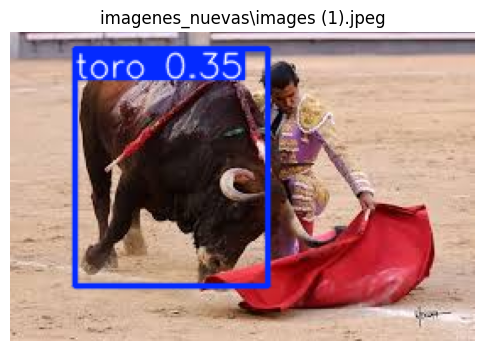

PRocesando imagen: imagenes_nuevas\images.jpeg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\images.jpeg: 448x640 1 toro, 111.7ms
Speed: 1.8ms preprocess, 111.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


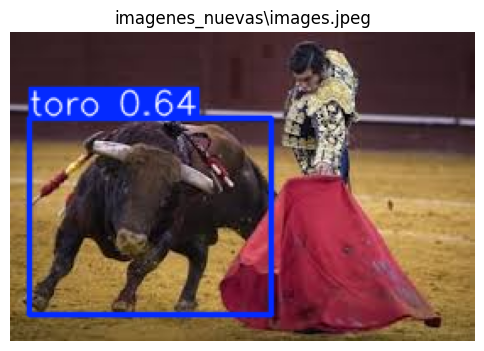

PRocesando imagen: imagenes_nuevas\istockphoto-171587972-612x612.jpg

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\istockphoto-171587972-612x612.jpg: 448x640 1 toro, 193.0ms
Speed: 2.4ms preprocess, 193.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


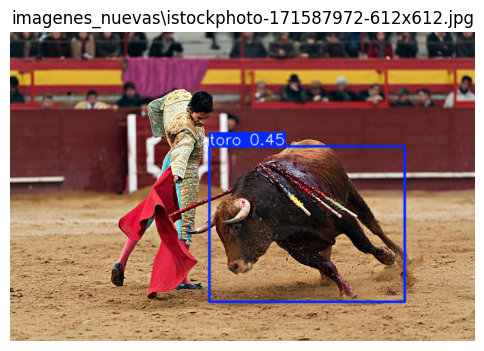

PRocesando imagen: imagenes_nuevas\Toro1.png

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\Toro1.png: 384x640 2 toros, 96.5ms
Speed: 3.7ms preprocess, 96.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


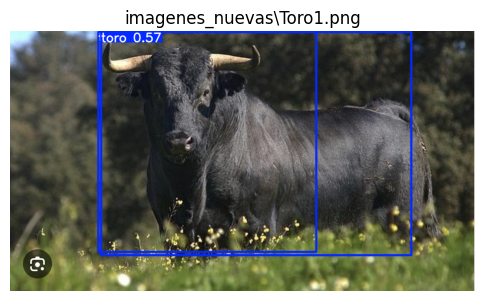

PRocesando imagen: imagenes_nuevas\Toro2.png

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\Toro2.png: 480x640 (no detections), 130.2ms
Speed: 2.8ms preprocess, 130.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


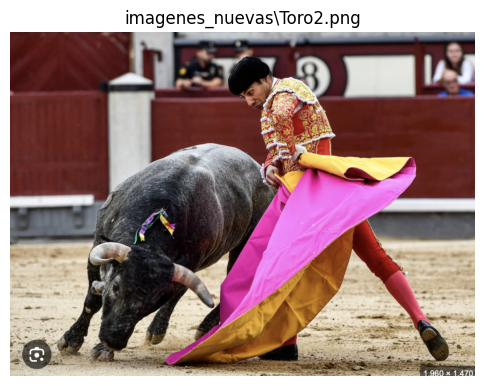

PRocesando imagen: imagenes_nuevas\Toro3.png

image 1/1 d:\FT-MTI\TERCER SEMESTRE\APRENDIZAJE ARTIFICIAL\proyecto-toros\imagenes_nuevas\Toro3.png: 384x640 4 toros, 111.4ms
Speed: 2.2ms preprocess, 111.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


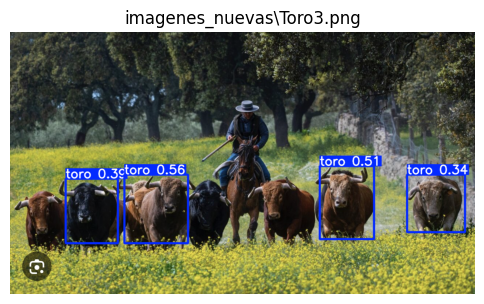

In [30]:
# Probar el modelo con imágenes nuevas

carpeta_pruebas = "imagenes_nuevas"

# Recorremos todos los archivos de la carpeta de pruebas
for nombre_archivo in os.listdir(carpeta_pruebas):
    ruta_completa = os.path.join(carpeta_pruebas, nombre_archivo)
    
    # Mostramos la ruta completa de la imagen
    print("PRocesando imagen:", ruta_completa)

    # Hacemos la predicción con el modelo entrenado
    resultados = modelo_toros(ruta_completa)

    # Tomamos el primer resultado y dibujamos las cajas
    resultado = resultados[0]
    imagen_con_cajas = resultado.plot()
    
    # Mostramos la imagen con la ruta como título
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen_con_cajas[:, :, ::-1])  # BGR → RGB
    plt.axis("off")
    plt.title(ruta_completa)
    plt.show()
